<a href="https://colab.research.google.com/github/Mingrui-Wang/Inverse-of-a-Matrix/blob/master/UCLA_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/暑期科研/"

os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['9total_y.npy',
 '9total_x.npy',
 'normal_hard.npy',
 'normal_hard_label.npy',
 'N_A_H_label.npy',
 'N_A_H.npy',
 'Anomaly_label.npy',
 'Anomaly.npy',
 'chromosome_9_label.npy',
 'chromosome_9.npy',
 'chromosome_harddata_label.npy',
 'chromosome_harddata.npy',
 '测试集_label.npy',
 '测试集.npy',
 '训练集_label.npy',
 '训练集.npy',
 '训练集500_label.npy',
 '训练集500.npy',
 '训练集400.npy',
 '训练集400_label.npy',
 '训练集300_label.npy',
 '训练集300.npy',
 'my_model.h5',
 'student_data.csv']

In [2]:
import pandas as pd
import numpy as np
# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')
# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [3]:
# Importing matplotlibimport matplotlib as mpl\n",
import matplotlib.pyplot as plt


# Function to help us plot
def plot_points(data):
    X = np.array(data[['gre','gpa']])
    y = np.array(data['admit'])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')

Number of training samples is320
Number of validation samples is80
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
152      1  0.800  0.9850       0       1       0       0
244      0  0.675  0.7600       1       0       0       0
388      0  0.800  0.7925       0       1       0       0
300      0  0.800  0.8250       0       1       0       0
392      1  0.750  0.8450       0       0       1       0
85       0  0.650  0.7450       0       1       0       0
231      0  0.750  0.8200       0       0       1       0
291      0  1.000  0.6950       0       1       0       0
283      0  0.650  0.7750       0       0       0       1
58       0  0.500  0.9125       0       1       0       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
0       0  0.475  0.9025       0       0       1       0
7       0  0.500  0.7700       0       1       0       0
8       1  0.675  0.8475       0       0       1       0
11      0  0.550  0.8050       1       0       0       0
12      1 

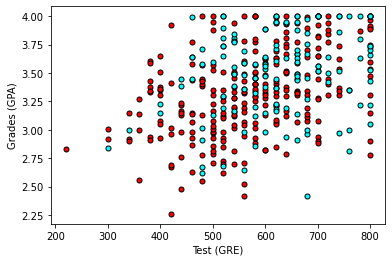

In [4]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)
# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

# Copying our data\n",
processed_data = one_hot_data[:]

# Scaling the columns\n",
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.8), replace=False)
train_data, val_data = processed_data.iloc[sample], processed_data.drop(sample)

print('Number of training samples is'+str(len(train_data)))
print('Number of validation samples is'+str(len(val_data)))
print(train_data[:10])

print(val_data[:10])

# Plotting the points
plot_points(data)
plt.show()

In [5]:
import keras

# Separate data and one-hot encode the output
# Note: We're also turning the data into numpy arrays, in order to train the model in Keras
features = np.array(train_data.drop('admit', axis=1))
targets = np.array(keras.utils.to_categorical(train_data['admit'], 2))
features_val = np.array(val_data.drop('admit', axis=1))
targets_val = np.array(keras.utils.to_categorical(val_data['admit'], 2))
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

from keras.layers import Input, Dense, Dropout
from keras.models import Model

# Input tensor
inputs = Input(shape=(6,))
# TODO: Building the model
x = Dense(6, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 620
Trainable params: 620
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(features, targets, batch_size=10,
                                  epochs=200,
                                  validation_data=(features_val, targets_val))

Epoch 1/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6432 - accuracy: 0.6750 - val_loss: 0.6072 - val_accuracy: 0.7125
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6750 - val_loss: 0.5949 - val_accuracy: 0.7125
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.6750 - val_loss: 0.5951 - val_accuracy: 0.7125
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.6750 - val_loss: 0.5938 - val_accuracy: 0.7125
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.6750 - val_loss: 0.5920 - val_accuracy: 0.7125
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.6750 - val_loss: 0.5907 - val_accuracy: 0.7125
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.6750 - val_loss: 0.5913 - val_accuracy: 0.7125
Epoch 8/200
3

In [7]:
np.set_printoptions(threshold=np.inf)
print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

[<tf.Variable 'dense/kernel:0' shape=(6, 6) dtype=float32, numpy=
array([[-0.5419596 ,  0.5074848 , -0.5889225 ,  0.08272381, -0.06621957,
         0.49242342],
       [-0.3408262 ,  0.58436775, -0.15009545,  0.31645462, -0.48582566,
        -0.5656811 ],
       [-0.33331278, -0.13037899,  0.70403975, -0.6219486 ,  0.45213476,
        -0.38537577],
       [-0.16090876,  0.06327468, -0.09943253, -0.54789853,  0.09413129,
         0.34802276],
       [-0.12152874, -0.36982694,  0.5868229 ,  0.61531   , -0.00787216,
        -0.6046874 ],
       [-0.02682245,  0.24450172,  0.12497485,  0.04669806, -0.6419516 ,
         0.8961478 ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(6,) dtype=float32, numpy=
array([ 0.        , -0.09246845,  0.02128557,  0.02190281,  0.03909958,
        0.14161906], dtype=float32)>, <tf.Variable 'dense_1/kernel:0' shape=(6, 64) dtype=float32, numpy=
array([[-0.204686  ,  0.01122636,  0.06372717, -0.12557478,  0.05348223,
         0.09848714,  0.01102716, 